In [1]:
# blank if notebook in same folder as run folder
run_folder_path = ''
#run_folder_path = 'local/runs/gamma7_gamma_hackfest4/'

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [4]:
data = {}
part = 1
while(True):
    results_path = 'results_part' + str(part) + '.p'
    if not os.path.exists(run_folder_path + results_path):
        break
    this = pickle.load(open(results_path, 'rb'))
    data.update(this)
    part += 1

In [5]:
all_runs = {
    'Rotate':{'x_drift':[], 'y_drift':[], 'z_drift':[]},
    'MoveForward':{'yaw_drift':[], 'z_drift':[]},
}
per_run = [{} for i in range(len(data))]
for i in range(len(data)):
    run = data[i]
    this_run = {
    'Rotate':{'x_drift':[], 'y_drift':[], 'z_drift':[]},
    'MoveForward':{'yaw_drift':[], 'z_drift':[]},
    }
    for j in range(len(run)):
        it = run[j]
        pos_before = it['pos_before']
        pos_after = it['pos_after']
        yaw_before = math.degrees(it['yaw_before'])
        yaw_after = math.degrees(it['yaw_after'])
        if it['action'] == 'Rotate':
            all_runs['Rotate']['x_drift'].append(pos_after[0] - pos_before[0])
            all_runs['Rotate']['y_drift'].append(pos_after[1] - pos_before[1])
            all_runs['Rotate']['z_drift'].append(pos_after[2] - pos_before[2])
            this_run['Rotate']['x_drift'].append(pos_after[0] - pos_before[0])
            this_run['Rotate']['y_drift'].append(pos_after[1] - pos_before[1])
            this_run['Rotate']['z_drift'].append(pos_after[2] - pos_before[2])
        if it['action'] == 'MoveForward':
            a = yaw_after - yaw_before
            a = (a + 180) % 360 - 180
            all_runs['MoveForward']['yaw_drift'].append(a)
            all_runs['MoveForward']['z_drift'].append(pos_after[2] - pos_before[2])
            this_run['MoveForward']['yaw_drift'].append(a)
            this_run['MoveForward']['z_drift'].append(pos_after[2] - pos_before[2])
    per_run[i] = this_run.copy()

In [18]:
def go(dic, action, drift):
    vals = np.array(dic[action][drift])
    #std = np.std(vals)
    std = np.sqrt(np.sum((vals - 0)**2) / len(vals))
    plt.title(f'Root Mean Squared Error from 0 = {std}')
    plt.xlabel(f'{action} {drift}')
    plt.ylabel('Bin Count')
    plt.hist(vals, bins=20)
    plt.show()

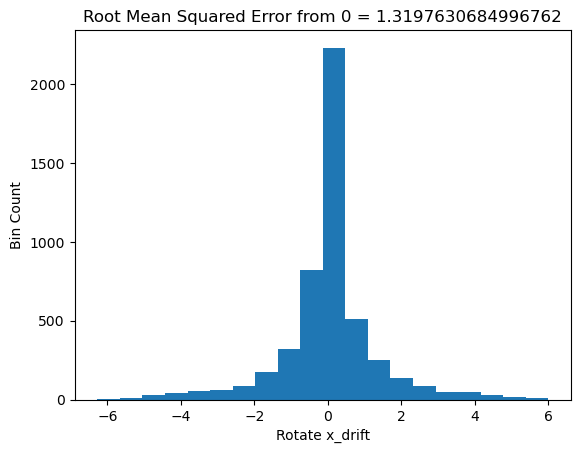

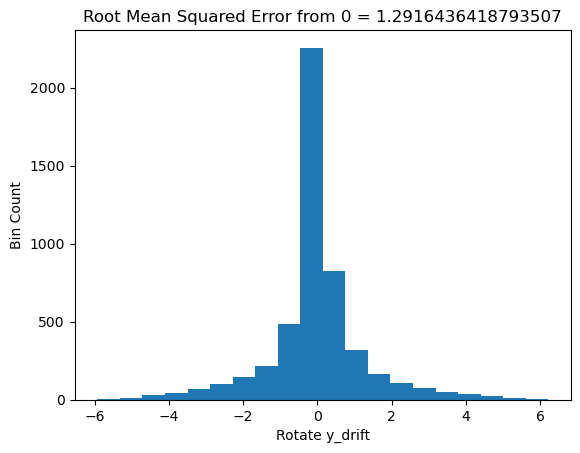

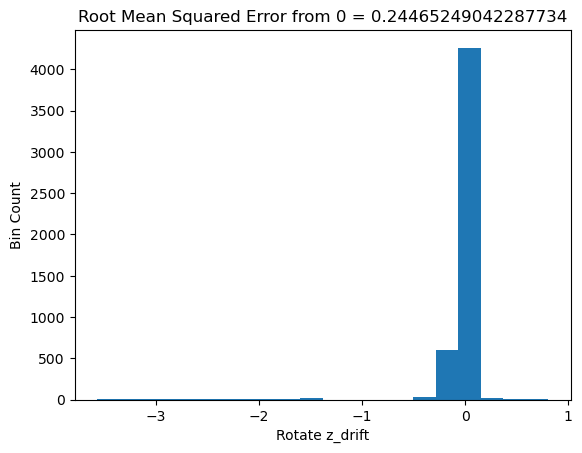

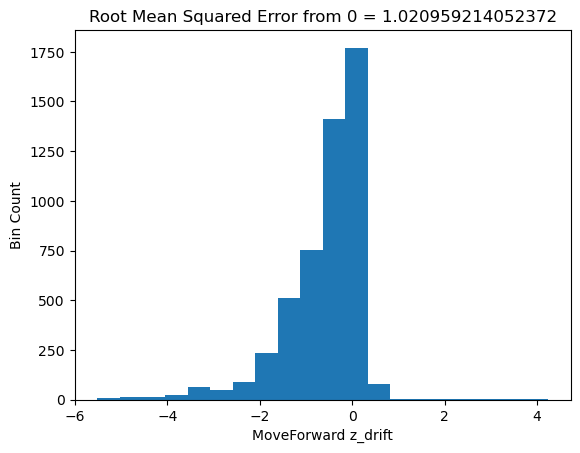

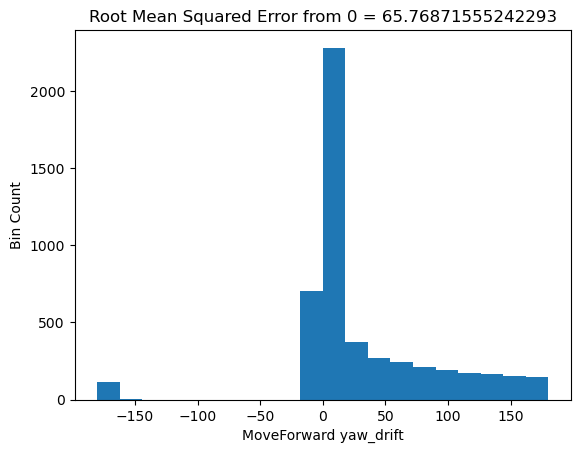

In [19]:
go(all_runs, 'Rotate', 'x_drift')
go(all_runs, 'Rotate', 'y_drift')
go(all_runs, 'Rotate', 'z_drift')
go(all_runs, 'MoveForward', 'z_drift')
go(all_runs, 'MoveForward', 'yaw_drift')

In [ ]:
def go2(arr, action, drift):
    stds = []
    for i in range(len(arr)):
        dic = arr[i]
        vals = dic[action][drift]
        std = np.std(vals)
        stds.append(std)
    plt.title(f'Standard Deviation Versus Time')
    plt.xlabel(f'iteration')
    plt.ylabel(f'STD {action} {drift}')
    plt.plot(stds)
    plt.show()

In [ ]:
go2(per_run, 'Rotate', 'x_drift')
go2(per_run, 'Rotate', 'y_drift')
go2(per_run, 'Rotate', 'z_drift')
go2(per_run, 'MoveForward', 'z_drift')
go2(per_run, 'MoveForward', 'yaw_drift')